In [32]:
import sympy as sp
import numpy as np
from sympy import symbols
from sympy import solve, nsolve
import matplotlib.pyplot as plt

In [33]:
def Weibull(Z2,sigma2W,etaW):
    # Getting the Weibull distribution
    term1 = etaW/(sigma2W)
    term2 = (Z2/sigma2W)**(etaW-1)
#     term3 = np.exp(-(Z2/sigma2W)**etaW)
    term3 = sp.exp(-(Z2/sigma2W)**etaW)
    rhoW = term1*term2*term3
    #rhoW = etaW/(sigma2W)*(Z2/sigma2W)**(etaW-1)*np.exp(-(Z2/sigma2W)**etaW)
    return rhoW

def logWeibull(Z2,sigma2W,etaW):
    return sp.log(Weibull(Z2,sigma2W,etaW))

In [34]:
Z2 = symbols('Z2')
etaW = symbols('etaW')
sigma2W = symbols('sigma2W')
myWeibull = Weibull(Z2,sigma2W,etaW)
mylogWeibull = logWeibull(Z2,sigma2W,etaW)
sp.pprint(mylogWeibull)

   ⎛                                  etaW⎞
   ⎜                         ⎛   Z₂  ⎞    ⎟
   ⎜              etaW - 1  -⎜───────⎟    ⎟
   ⎜     ⎛   Z₂  ⎞           ⎝sigma2W⎠    ⎟
   ⎜etaW⋅⎜───────⎟        ⋅ℯ              ⎟
   ⎜     ⎝sigma2W⎠                        ⎟
log⎜──────────────────────────────────────⎟
   ⎝               sigma2W                ⎠


In [35]:
def get_Taylor(sympy_function,x,x0,degree):
    i = 0
    taylor_exp = sp.Integer(0)
    while i <= degree:
        taylor_exp = taylor_exp + (sp.diff(sympy_function,x,i).subs(x,x0))/(sp.factorial(i))*(x-x0)**i
        i += 1
    return(taylor_exp)

def get_Taylor_term(sympy_function,x,x0,degree):
    i = degree
    term = sp.diff(sympy_function,x,i).subs(x,x0)/(sp.factorial(i))
    return term

In [36]:
# Testing the code
x = symbols('x')
myfunc = sp.exp(x)
myTaylor = get_Taylor(myfunc,x,0,2); print (myTaylor)
for i in range(3):
    term = get_Taylor_term(myfunc,x,1.0001,i); print(term)

x**2/2 + x + 1
2.71855367023375
2.71855367023375
1.35927683511688


In [37]:
term0 = get_Taylor_term(logWeibull(Z2,sigma2W,etaW),Z2,sigma2W,0)
term0 = sp.expand(term0)
# print(term0)
sp.pprint(term0)

   ⎛  etaW ⎞    
log⎜───────⎟ - 1
   ⎝sigma2W⎠    


In [38]:
term1 = get_Taylor_term(logWeibull(Z2,sigma2W,etaW),Z2,sigma2W,1)
term1 = term1.simplify()
# print(term1)
sp.pprint(term1)

  -1   
───────
sigma2W


In [39]:
term2 = get_Taylor_term(logWeibull(Z2,sigma2W,etaW),Z2,sigma2W,2)
# print(term2)
sp.pprint(term2)

                               2
-2⋅etaW⋅(etaW - 1) + (etaW - 1) 
────────────────────────────────
                    2           
           2⋅sigma2W            


In [40]:
mylogTaylor = get_Taylor(logWeibull(Z2,sigma2W,etaW),Z2,sigma2W,2)
print('First try:'); sp.pprint(mylogTaylor)
mylogTaylor = sp.expand(mylogTaylor)
print('\n\n Second try:'); sp.pprint(mylogTaylor)
mylogTaylor = sp.simplify(mylogTaylor)
print('\n\n Third try:'); sp.pprint(mylogTaylor)

First try:
                                                                              
                                                                              
                                                                     ℯ⋅sigma2W
   ⎛      -1⎞                 2 ⎛                               2⎞            
   ⎜etaW⋅ℯ  ⎟   (Z₂ - sigma2W) ⋅⎝-2⋅etaW⋅(etaW - 1) + (etaW - 1) ⎠            
log⎜────────⎟ + ────────────────────────────────────────────────── + ─────────
   ⎝sigma2W ⎠                                2                                
                                    2⋅sigma2W                                 

                ⎛      2  -1                    -1⎞
                ⎜  etaW ⋅ℯ     etaW⋅(etaW - 1)⋅ℯ  ⎟
⋅(Z₂ - sigma2W)⋅⎜- ───────── + ───────────────────⎟
                ⎜          2                2     ⎟
                ⎝   sigma2W          sigma2W      ⎠
───────────────────────────────────────────────────
                   etaW                     

In [41]:
f_mylogTaylor = lambda Z2, etaW, sigma2W: mylogTaylor
term0 = get_Taylor_term(f_mylogTaylor(Z2,sigma2W,etaW),Z2,0,0)
print('First term:'); sp.pprint(term0)
term1 = get_Taylor_term(f_mylogTaylor(Z2,sigma2W,etaW),Z2,0,1)
print('\n\n Second term:'); sp.pprint(term1)
term2 = get_Taylor_term(f_mylogTaylor(Z2,sigma2W,etaW),Z2,0,2)
print('\n\n Third term:'); sp.pprint(term2)

First term:
      2                   
  etaW       ⎛  etaW ⎞   1
- ───── + log⎜───────⎟ + ─
    2        ⎝sigma2W⎠   2


 Second term:
    2    
etaW  - 2
─────────
 sigma2W 


 Third term:
 ⎛    2    ⎞ 
-⎝etaW  - 1⎠ 
─────────────
           2 
  2⋅sigma2W  


In [42]:
a = symbols('a')
b = symbols('b')
c = symbols('c')
Equation_a = term0-a; sp.pprint(Equation_a)
Equation_b = term1-b; sp.pprint(Equation_b)
Equation_c = term2-c; sp.pprint(Equation_c)

         2                   
     etaW       ⎛  etaW ⎞   1
-a - ───── + log⎜───────⎟ + ─
       2        ⎝sigma2W⎠   2
         2    
     etaW  - 2
-b + ─────────
      sigma2W 
         2     
     etaW  - 1 
-c - ──────────
              2
     2⋅sigma2W 


### Solving Eq. b for $\sigma_W$ first
This works, but it is analytically problematic, as discussed below.

In [43]:
# Solve Eq. b for sigma2W
temp = solve(Equation_b, sigma2W)
sigma2W_from_Equation_b = temp[0]
sp.pprint(sigma2W_from_Equation_b)

    2    
etaW  - 2
─────────
    b    


In [44]:
# Solve Eq. c for sigma2W
temp = solve(Equation_c, sigma2W)
sigma2W_from_Equation_c = temp[0]
sp.pprint(sigma2W_from_Equation_c)

        ___________
       ╱         2 
      ╱  1 - etaW  
√2⋅  ╱   ───────── 
   ╲╱        c     
───────────────────
         2         


In [45]:
# Insert Eq. b's sigma2W into Eq. c and solve for etaW
Equation_c_after_using_Equation_b = Equation_c.subs(sigma2W,sigma2W_from_Equation_b)
sp.pprint(Equation_c_after_using_Equation_b)
etaW_solved = solve(Equation_c_after_using_Equation_b,etaW)
for possible_etaW_solved in etaW_solved:
    sp.pprint(possible_etaW_solved)
solution_for_etaW = etaW_solved[1]
print('\n\n Most likely solution for etaW_solved')
sp.pprint(solution_for_etaW)

# # Insert Eq. c's sigma2W into Eq. b and solve for etaW
# Equation_b_after_using_Equation_c = Equation_b.subs(sigma2W,sigma2W_from_Equation_c)
# sp.pprint(Equation_b_after_using_Equation_c)
# etaW_solved = solve(Equation_c_after_using_Equation_b,etaW)
# # solution_for_etaW = etaW_solved[1]
# # print('\n\n Most likely solution for etaW_solved')
# # sp.pprint(solution_for_etaW)
# for possible_etaW_solved in etaW_solved:
#     sp.pprint(possible_etaW_solved)

   2 ⎛    2    ⎞    
  b ⋅⎝etaW  - 1⎠    
- ────────────── - c
               2    
    ⎛    2    ⎞     
  2⋅⎝etaW  - 2⎠     
       ____________________________ 
      ╱             __________      
     ╱     2       ╱  2             
    ╱     b    b⋅╲╱  b  - 8⋅c       
-  ╱    - ── - ─────────────── + 8  
 ╲╱       c           c             
────────────────────────────────────
                 2                  
      ____________________________
     ╱             __________     
    ╱     2       ╱  2            
   ╱     b    b⋅╲╱  b  - 8⋅c      
  ╱    - ── - ─────────────── + 8 
╲╱       c           c            
──────────────────────────────────
                2                 
       ____________________________ 
      ╱             __________      
     ╱     2       ╱  2             
    ╱     b    b⋅╲╱  b  - 8⋅c       
-  ╱    - ── + ─────────────── + 8  
 ╲╱       c           c             
────────────────────────────────────
                 2                  
  

### Let's see about numerical solutions -- the brute force numerical method

In [46]:
# # This is for segments3
# a_quadratic_optimized = 4.791631591414573
# b_quadratic_optimized = -128.84313838805272
# c_quadratic_optimized = 868.2373968598321

# This is for segments4
a_quadratic_optimized = 5.486961758908045
b_quadratic_optimized = -379.2366070465658
c_quadratic_optimized = 4443.0758460081615

                                     ⎛    2    ⎞
                    71910.2020620957⋅⎝etaW  - 1⎠
-4443.07584600816 - ────────────────────────────
                                       2        
                            ⎛    2    ⎞         
                            ⎝etaW  - 2⎠         


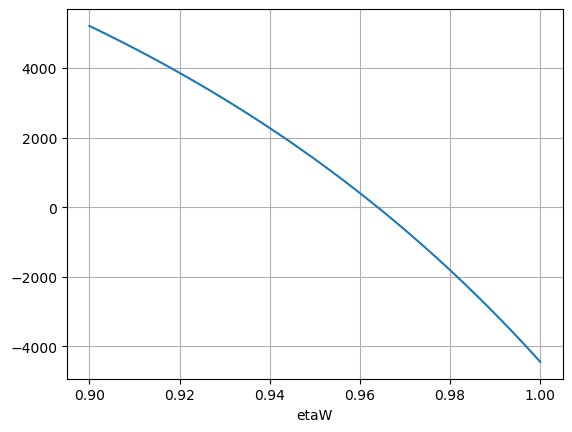

In [47]:
subb = Equation_c_after_using_Equation_b.subs(b,b_quadratic_optimized)
Equation_c_after_using_Equation_b_numerical = subb.subs(c,c_quadratic_optimized)
sp.pprint(Equation_c_after_using_Equation_b_numerical)

f_Equation_c_after_using_Equation_b_numerical = \
    lambda dummy: Equation_c_after_using_Equation_b_numerical.subs(etaW,dummy)

etaW_numerical_array = np.linspace(.9,1)
test = []
for etaW_numerical in etaW_numerical_array:
    test.append(f_Equation_c_after_using_Equation_b_numerical(etaW_numerical))
test = np.array(test)

plt.figure()
plt.plot(etaW_numerical_array,test)
plt.xlabel('etaW')
plt.grid(True)

### Now let's try the analytical solution

$$
\eta_W = {1\over2}\sqrt{{-b^2 \over c} - {b\sqrt{b^2 - 8c} \over c} + 8} \ \ \ \ (1)
$$

$$
\sigma_W = \sqrt{1 - \eta^2 \over 2c} \ \ \ \ (2)
$$

In [48]:
# Here are the results, summarized
print('First solve for etaW:')
sp.pprint(solution_for_etaW)
print(solution_for_etaW)
print('\n\n From there, we get sigma2W:')
sp.pprint(sigma2W_from_Equation_c)
print('Then get sigmaW:')
sigmaW_from_Equation_c = sp.sqrt(sigma2W_from_Equation_c)
sigmaW_from_Equation_c = sp.simplify(sigmaW_from_Equation_c)
sp.pprint(sigmaW_from_Equation_c)
print(sigmaW_from_Equation_c)

First solve for etaW:
      ____________________________
     ╱             __________     
    ╱     2       ╱  2            
   ╱     b    b⋅╲╱  b  - 8⋅c      
  ╱    - ── - ─────────────── + 8 
╲╱       c           c            
──────────────────────────────────
                2                 
sqrt(-b**2/c - b*sqrt(b**2 - 8*c)/c + 8)/2


 From there, we get sigma2W:
        ___________
       ╱         2 
      ╱  1 - etaW  
√2⋅  ╱   ───────── 
   ╲╱        c     
───────────────────
         2         
Then get sigmaW:
          ___________
         ╱         2 
 3/4    ╱  1 - etaW  
2   ⋅4 ╱   ───────── 
     ╲╱        c     
─────────────────────
          2          
2**(3/4)*((1 - etaW**2)/c)**(1/4)/2


In [49]:
# Get etaW
etaW_result = solution_for_etaW.subs({b:b_quadratic_optimized,c:c_quadratic_optimized})
print('etaW =', etaW_result)

# Get sigmaW
sigmaW_result = sigmaW_from_Equation_c.subs({etaW:etaW_result,c:c_quadratic_optimized}).evalf()
print('sigmaW =',sigmaW_result)

etaW = 0.963923232658461
sigmaW = 0.0531385378399807


### Thoughts on this
1. The Weibull parameters that result from this process seem quite reasonable. The limit of going from Weibull to Gaussian, $\eta W → 1$ and $c → 0$, has numerator and denomninator in Eq. 2 both going to zero. It would be preferable to have a formulation that makes this limit more transparent, but when I try solving in the opposite order the $c$ in the denominator is still there. 

1. The Weibull function using those parameters is a little disappointing: it's not as curved as the polynomial fit, and it doesn't go through experimental points as well as the polynomial fit. So that begs the question, why use Weibull at all? 

### Solve Eq. 2 for $\eta_W$ first

In [50]:
# Solve Eq. b for etaW
temp = solve(Equation_b, etaW)
etaW_from_Equation_b = temp[1]
sp.pprint(etaW_from_Equation_b)
print(etaW_from_Equation_b)

  _______________
╲╱ b⋅sigma2W + 2 
sqrt(b*sigma2W + 2)


In [51]:
# Solve Eq. c for etaW
temp = solve(Equation_c, etaW)
etaW_from_Equation_c = temp[1]
sp.pprint(etaW_from_Equation_c)

   ____________________
  ╱              2     
╲╱  - 2⋅c⋅sigma2W  + 1 


In [58]:
# Insert Eq. b's etaW into Eq. c and solve for sigma2W
sp.pprint(Equation_c); print('\n')
Equation_c_after_using_Equation_b = Equation_c.subs(etaW,etaW_from_Equation_b)
sp.pprint(Equation_c_after_using_Equation_b)
sigma2W_solved = solve(Equation_c_after_using_Equation_b,sigma2W)
print('\n possible solutions:')
for possible_sigma2W_solved in sigma2W_solved:
    sp.pprint(possible_sigma2W_solved)
solution_for_sigma2W = sigma2W_solved[0]
print('\n\n Most likely solution for sigma2W_solved')
sp.pprint(solution_for_sigma2W)
print(solution_for_sigma2W)

    
# # Insert Eq. c's etaW into Eq. b and solve for sigma2W
# sp.pprint(Equation_b); print('\n')
# Equation_b_after_using_Equation_c = Equation_b.subs(etaW,etaW_from_Equation_c)
# sp.pprint(Equation_b_after_using_Equation_c)
# sigma2W_solved = solve(Equation_b_after_using_Equation_c,sigma2W)
# print('\n possible solutions:')
# for possible_sigma2W_solved in sigma2W_solved:
#     sp.pprint(possible_sigma2W_solved)

         2     
     etaW  - 1 
-c - ──────────
              2
     2⋅sigma2W 


     b⋅sigma2W + 1
-c - ─────────────
                2 
       2⋅sigma2W  

 possible solutions:
        __________
       ╱  2       
-b - ╲╱  b  - 8⋅c 
──────────────────
       4⋅c        
        __________
       ╱  2       
-b + ╲╱  b  - 8⋅c 
──────────────────
       4⋅c        


 Most likely solution for sigma2W_solved
        __________
       ╱  2       
-b - ╲╱  b  - 8⋅c 
──────────────────
       4⋅c        
(-b - sqrt(b**2 - 8*c))/(4*c)


### Summary
These are alternatives to Eqs. 1 and 2:
$$
\sigma_W^2 = -{b+\sqrt{b^2-8c} \over 4c} \ \ \ \ (3)
$$

$$
\eta_W = \sqrt{1-2c\sigma_W^4} \ \ \ \ (4)
$$

Eq. 3 $\sigma_W^2$ still has a $c$ in the denominator, but at least now it's clear how to do the limit when $c → 0$. Equation 4 will give $\eta_W=0$. For Eq. 3, we can do a taylor expansion of the square root:

$$
\sigma_W^2 = -{b+|b|\sqrt{1-{8c \over b^2}} \over 4c} \approx -{b+|b|(1-{4c \over b^2}) \over 4c} = -{1 \over b} \ \ \ \ (3)
$$

where the last equality follows when $b<0$ (as is expected and observed).

In [59]:
# Get sigmaW
sigma2W_result = solution_for_sigma2W.subs({b:b_quadratic_optimized,c:c_quadratic_optimized}).evalf()
print('sigma2W =',sigma2W_result)
print('sigmaW =',sigma2W_result**.5)

# Get etaW
etaW_result = etaW_from_Equation_c.subs({c:c_quadratic_optimized,sigma2W:sigma2W_result})
print('etaW =', etaW_result)

# Get etaW
etaW_result = etaW_from_Equation_b.subs({b:b_quadratic_optimized,sigma2W:sigma2W_result})
print('etaW =', etaW_result)

sigma2W = 0.00282370420377106
sigmaW = 0.0531385378399807
etaW = 0.963923232658461
etaW = 0.963923232658461


### Here we're trying to get the normalization factor for the Q probability density

We're defining the Q probability density as 

$$
\rho_Q = e^{a+bZ^2+cZ^4} \ \ \ \ (4)
$$

If we use the substitutions

$$
    \sigma^2_Q = -1/b \ \ \ \ (5)
$$

$$
    \eta_Q = (1-{2c \over b^2})^{1 \over 2} \ \ \ \ (6)
$$

$$
    N_Q = e^a \ \ \ \ (7)
$$

Then we can write Eq. 4 as 

$$
\rho_Q = N_Q e^{-Z^2/\sigma^2_Q}e^{{}Z^4({1-\eta_Q^2 \over 2 \sigma_Q^4})} \ \ \ \ (8)
$$

In [74]:
sigma2Q = sp.symbols('sigma2Q')
etaQ = sp.symbols('etaQ')
b = sp.symbols('b',real=True, negative=True)
c = sp.symbols('c', real=True)
# rhoQ = sp.exp(-Z2/sigma2Q + Z2**2*(1-etaQ**2)/(2*sigma2Q**2))
# sp.pprint(rhoQ)
# NQ = 1/sp.integrate(rhoQ, (Z2, 0, 'oo'))
# sp.pprint(NQ)


rhoQ = sp.exp(-b*Z2 + Z2**2*c)